In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
chicago = pd.read_csv('Crimes_-_2001_to_present.csv',error_bad_lines=False)
crimeGeo = pd.read_csv('crimeGeo.csv',error_bad_lines=False)

In [72]:
chicago.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"


In [4]:
crimeGeo.head()

,10000092,41.891398861,-87.744384567,2015,false,false.1
0,10000094,41.773372,-87.665319,2015,True,False
1,10000095,41.813861,-87.596643,2015,False,True
2,10000096,41.800802,-87.622619,2015,False,False
3,10000097,41.878065,-87.743354,2015,False,False
4,10000098,41.805443,-87.604284,2015,False,False


In [14]:
#arrested = chicago.loc[chicago['Arrest'] == True, ['Primary Type']]
#Types = arrested.groupby([arrested['Primary Type']]).size().sort_values(ascending=True)
#Types

In [31]:
#np.savetxt(r'E:\MIT IN BIG DATA SCIENCE 2018\second semester\MIT805 - Big Data\assignment 2\np.txt', Types, fmt='%d')

In [15]:
#print("Chicago dataset shape", chicago.shape)

In [3]:
chicago.drop(['Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate',
             'Updated On', 'Year', 'FBI Code','Beat','Ward','Location', 'District','Community Area'], inplace=True, axis=1)


In [74]:
chicago.head(2)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude
0,10000092,03/18/2015 07:44:00 PM,047XX W OHIO ST,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,41.891399,-87.744385
1,10000094,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,41.773372,-87.665319


In [4]:
# dates to datetime format
chicago.Date = pd.to_datetime(chicago.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
chicago.index = pd.DatetimeIndex(chicago.Date)


In [5]:
#block_to_change = list(chicago['Block'].value_counts()[0:].index)
loc_to_change  = list(chicago['Location Description'].value_counts().head(10).index)
#desc_to_change = list(chicago['Description'].value_counts()[0:].index)
#type_to_change = list(chicago['Primary Type'].value_counts()[0:].index)

In [ ]:
loc_to_change

In [6]:
#chicago.loc[~chicago['Block'].isin(block_to_change) , chicago.columns=='Block'] = 'OTHER'
chicago.loc[~chicago['Location Description'].isin(loc_to_change) , chicago.columns=='Location Description'] = 'IGNORED'
#chicago.loc[~chicago['Description'].isin(desc_to_change) , chicago.columns=='Description'] = 'OTHER'
#chicago.loc[~chicago['Primary Type'].isin(type_to_change) , chicago.columns=='Primary Type'] = 'OTHER'

In [7]:
chicago['Block']                = pd.Categorical(chicago['Block'])
chicago['Location Description'] = pd.Categorical(chicago['Location Description'])
chicago['Description']          = pd.Categorical(chicago['Description'])
chicago['Primary Type']         = pd.Categorical(chicago['Primary Type'])

In [26]:
#plt.figure(figsize=(12,6))
#chicago.resample('Y').size().plot(legend=False)
#plt.title('Number of crimes per month')
#plt.xlabel('Months')
#plt.ylabel('Number of crimes')
#plt.show()

In [27]:
#crimes_per_month = chicago.resample('M').size()
#crimes_per_month.head(10)

In [28]:
#plt.figure(figsize=(12,6))
#crimes_per_month.plot(legend=False)
#plt.title('Number of crimes per month')
#plt.xlabel('Months')
#plt.ylabel('Number of crimes')
#plt.show()

In [29]:
#plt.figure(figsize=(12,6))
#chicago.resample('D').size().rolling(365).sum().plot()
#plt.title('Rolling sum of all crimes')
#plt.ylabel('Number of crimes')
#plt.xlabel('Years')
#plt.show()

In [12]:
crimes_count_date = chicago.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=chicago.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)

In [7]:
#plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [8]:
#Types = chicago.groupby([chicago['Primary Type']]).size().sort_values(ascending=True)
#Types

In [9]:
#plt.figure(figsize=(8,10))
#Types.plot(kind='barh')
#plt.title('Number of crimes by type')
#plt.ylabel('Crime Type')
#plt.xlabel('Number of crimes')
#plt.show()

In [10]:
#chicago.groupby([chicago['Location Description']]).size().sort_values(ascending=True)

In [11]:
#plt.figure(figsize=(8,10))
#chicago.groupby([chicago['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
#plt.title('Number of crimes by Location')
#plt.ylabel('Crime Location')
#plt.xlabel('Number of crimes')
#plt.show()

# crime rates by type and location

In [8]:
hour_by_location = chicago.pivot_table(values='ID', index='Location Description', columns=chicago.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = chicago.pivot_table(values='ID', index='Primary Type', columns=chicago.index.hour, aggfunc=np.size).fillna(0)

In [9]:
hour_by_type

Date,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,902.0,938.0,919.0,855.0,755.0,572.0,365.0,264.0,240.0,229.0,...,232.0,237.0,261.0,289.0,316.0,387.0,437.0,553.0,637.0,701.0
ASSAULT,13369.0,10708.0,8816.0,6447.0,4728.0,3796.0,4506.0,7699.0,14331.0,17765.0,...,26314.0,27511.0,25042.0,24479.0,24485.0,23962.0,23430.0,21819.0,19316.0,16468.0
BATTERY,60729.0,58428.0,52214.0,42287.0,29654.0,20035.0,16898.0,21242.0,32332.0,37942.0,...,61995.0,67049.0,60695.0,60280.0,63314.0,65451.0,67423.0,69785.0,70034.0,66038.0
BURGLARY,17138.0,8771.0,8155.0,7617.0,7291.0,8699.0,12621.0,20594.0,25824.0,23128.0,...,18507.0,18757.0,18007.0,18919.0,18974.0,16196.0,14814.0,14335.0,15093.0,11440.0
CONCEALED CARRY LICENSE VIOLATION,9.0,10.0,10.0,5.0,5.0,8.0,12.0,13.0,8.0,5.0,...,7.0,5.0,7.0,8.0,13.0,20.0,14.0,12.0,22.0,15.0
CRIM SEXUAL ASSAULT,3539.0,1579.0,1660.0,1548.0,1306.0,919.0,669.0,588.0,647.0,681.0,...,737.0,949.0,921.0,900.0,938.0,1006.0,1179.0,1235.0,1535.0,1560.0
CRIMINAL DAMAGE,56297.0,32793.0,28050.0,23308.0,18032.0,14387.0,14846.0,19616.0,24936.0,25671.0,...,27443.0,32029.0,33920.0,39191.0,43900.0,43573.0,46254.0,48702.0,52499.0,41690.0
CRIMINAL TRESPASS,6641.0,5007.0,4106.0,3256.0,2599.0,2251.0,2507.0,4279.0,6418.0,7582.0,...,10512.0,10213.0,9754.0,9883.0,11266.0,12968.0,12689.0,12023.0,10087.0,8018.0
DECEPTIVE PRACTICE,28865.0,3648.0,3265.0,2827.0,2168.0,1670.0,2111.0,3780.0,11205.0,28429.0,...,14387.0,14931.0,13480.0,12610.0,10608.0,9444.0,7701.0,5541.0,4622.0,4078.0


In [124]:
hour_by_location

Date,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Location Description,,,,,,,,,,,,,,,,,,,,,
ALLEY,6962,5101,4192,3362,2350,1765,1668,2122,3051,3591,...,7467,7889,7754,7633,8856,10622,10632,10440,10049,8239
APARTMENT,40036,26575,22761,19091,15376,13803,15782,21920,29197,34334,...,28862,31359,31829,32109,33602,33286,33895,34719,35153,32921
IGNORED,66392,42968,37221,30259,22118,17468,20981,29038,45791,60920,...,83794,90182,88086,87958,87299,85620,79082,71683,65619,55122
OTHER,14114,5418,4527,3691,2827,2641,3414,5514,9273,14710,...,14746,15677,14870,15130,14755,13292,12083,10975,10062,7881
PARKING LOT/GARAGE(NON.RESID.),7673,4256,3662,3076,2340,2494,3969,5988,7690,8331,...,10300,10990,11071,11504,12278,11828,10524,9738,8940,7025
RESIDENCE,82474,32612,27424,22555,18115,16286,20525,31902,50143,72393,...,52839,55150,50976,51426,53660,51786,52535,51775,51138,44350
RESIDENCE-GARAGE,10595,3823,2760,2389,2036,2357,3350,4465,5635,5777,...,4640,5332,5503,6664,7954,7201,7797,8267,9445,6143
"SCHOOL, PUBLIC, BUILDING",941,324,237,189,169,166,454,3149,12496,16197,...,17311,9334,3610,2119,1582,1204,948,777,592,361
SIDEWALK,27037,21690,17800,13454,8923,5680,5113,6903,10460,12853,...,36750,41371,36764,34432,40520,50013,49375,47708,43188,34974


In [125]:
#dayofweek_by_location = chicago.pivot_table(values='ID', index='Location Description', columns=chicago.index.dayofweek, aggfunc=np.size).fillna(0)
#dayofweek_by_type = chicago.pivot_table(values='ID', index='Primary Type', columns=chicago.index.dayofweek, aggfunc=np.size).fillna(0)
#location_by_type  = chicago.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)

In [10]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='plasma'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
#def normalize(df):
#    result = df.copy()
 #   for feature_name in df.columns:
#        max_value = df[feature_name].max()
#        min_value = df[feature_name].min()
#        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
#    return result

c:\users\henry\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


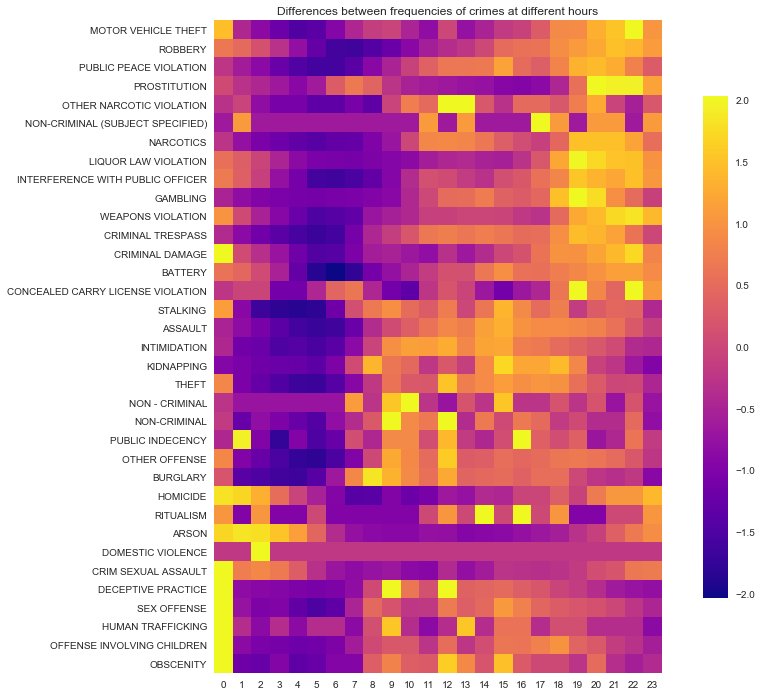

In [11]:
plt.figure(figsize=(15,12))
plt.title('Differences between frequencies of crimes at different hours')
scale_and_plot(hour_by_type)

c:\users\henry\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


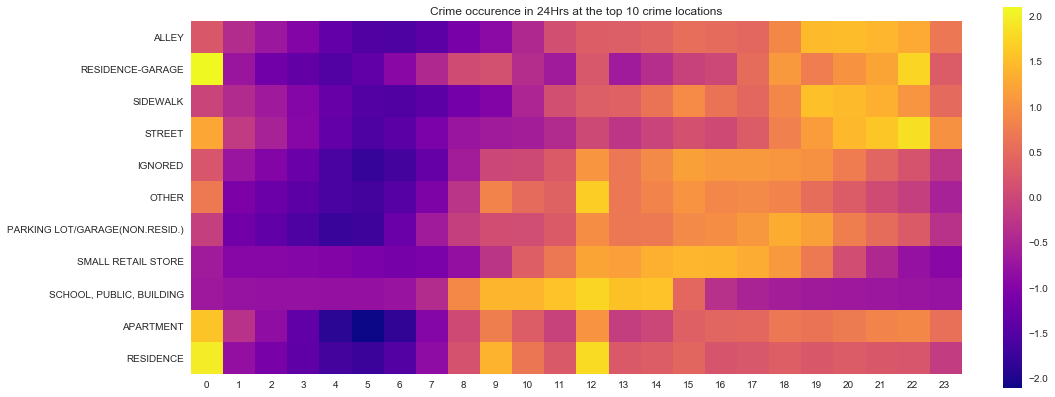

In [130]:
plt.figure(figsize=(15,7))
plt.title('Crime occurence in 24Hrs at the top 10 crime locations') 
scale_and_plot(hour_by_location)